In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# importing enrollments data
data_enr = pd.read_csv('enrollments.csv')
data_eng = pd.read_csv('daily_engagement.csv')
data_sub = pd.read_csv('project_submissions.csv')

# Enrollmnets

In [3]:
data_enr.head()

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,448,canceled,2014-11-10,2015-01-14,65.0,True,True
1,448,canceled,2014-11-05,2014-11-10,5.0,True,True
2,448,canceled,2015-01-27,2015-01-27,0.0,True,True
3,448,canceled,2014-11-10,2014-11-10,0.0,True,True
4,448,current,2015-03-10,NaN,NaN,True,False


In [4]:
# it can be seen that cancel_date and days_to_cancel have empty columns
# those will be replaced with none and 0
data_enr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
account_key       1640 non-null int64
status            1640 non-null object
join_date         1640 non-null object
cancel_date       988 non-null object
days_to_cancel    988 non-null float64
is_udacity        1640 non-null bool
is_canceled       1640 non-null bool
dtypes: bool(2), float64(1), int64(1), object(3)
memory usage: 67.3+ KB


In [5]:
data_enr['days_to_cancel'] = data_enr['days_to_cancel'].apply(lambda x: '' if np.isnan(x) else int(x))

In [6]:
data_enr['cancel_date'] =data_enr['cancel_date'].apply(lambda x: None if type(x) == float else x)

In [7]:
data_enr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1640 entries, 0 to 1639
Data columns (total 7 columns):
account_key       1640 non-null int64
status            1640 non-null object
join_date         1640 non-null object
cancel_date       988 non-null object
days_to_cancel    1640 non-null object
is_udacity        1640 non-null bool
is_canceled       1640 non-null bool
dtypes: bool(2), int64(1), object(4)
memory usage: 67.3+ KB


In [8]:
data_enr.head()

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,448,canceled,2014-11-10,2015-01-14,65,True,True
1,448,canceled,2014-11-05,2014-11-10,5,True,True
2,448,canceled,2015-01-27,2015-01-27,0,True,True
3,448,canceled,2014-11-10,2014-11-10,0,True,True
4,448,current,2015-03-10,None,,True,False


In [9]:
# the data in the join_date and cancel_date columns is not in date format
t = data_enr['join_date'].iloc[0]
type(t)

str

In [10]:
tc = data_enr['cancel_date'].iloc[0]
type(tc)

str

In [11]:
# changing the data in the two columns to datetime format
data_enr['join_date'] = data_enr['join_date'].apply(lambda x: pd.to_datetime(x) if x != None else x)
data_enr['cancel_date'] = data_enr['cancel_date'].apply(lambda x: pd.to_datetime(x) if x != None else x)

In [12]:
t = data_enr['join_date'].iloc[0]
type(t)

pandas.tslib.Timestamp

In [13]:
tc = data_enr['cancel_date'].iloc[0]
type(tc)

pandas.tslib.Timestamp

In [14]:
data_enr.head()

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,448,canceled,2014-11-10,2015-01-14,65,True,True
1,448,canceled,2014-11-05,2014-11-10,5,True,True
2,448,canceled,2015-01-27,2015-01-27,0,True,True
3,448,canceled,2014-11-10,2014-11-10,0,True,True
4,448,current,2015-03-10,NaT,,True,False


# Daily Engagement

In [15]:
data_eng.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1.0,11.679374,0.0,0.0
1,0,2015-01-10,2.0,37.284887,0.0,0.0
2,0,2015-01-11,2.0,53.633746,0.0,0.0
3,0,2015-01-12,1.0,33.489270,0.0,0.0
4,0,2015-01-13,1.0,64.779678,0.0,0.0


In [16]:
data_eng.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136240 entries, 0 to 136239
Data columns (total 6 columns):
acct                     136240 non-null int64
utc_date                 136240 non-null object
num_courses_visited      136240 non-null float64
total_minutes_visited    136240 non-null float64
lessons_completed        136240 non-null float64
projects_completed       136240 non-null float64
dtypes: float64(4), int64(1), object(1)
memory usage: 6.2+ MB


In [17]:
# changing the utc_date to datetime format
data_eng.utc_date = data_eng.utc_date.apply(lambda x: pd.to_datetime(x))

In [18]:
data_eng.utc_date[0]

Timestamp('2015-01-09 00:00:00')

In [19]:
# converting values in num_courses_visited, lessons_completed and projects_completed to integers
data_eng.num_courses_visited = data_eng.num_courses_visited.apply(lambda x: int(x))
data_eng.lessons_completed = data_eng.lessons_completed.apply(lambda x: int(x))
data_eng.projects_completed = data_eng.projects_completed.apply(lambda x: int(x))

In [20]:
# rounding data up
data_eng.total_minutes_visited = data_eng.total_minutes_visited.apply(lambda x: int(round(x)))

In [21]:
data_eng.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1,12,0,0
1,0,2015-01-10,2,37,0,0
2,0,2015-01-11,2,54,0,0
3,0,2015-01-12,1,33,0,0
4,0,2015-01-13,1,65,0,0


In [22]:
# change the name of the acct column to match the rest as account_key
new_cols = data_eng.columns.values
new_cols[0] = 'account_key'
data_eng.colums = new_cols
data_eng.account_key = data_eng.acct

In [23]:
data_eng.head()

,account_key,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed
0,0,2015-01-09,1,12,0,0
1,0,2015-01-10,2,37,0,0
2,0,2015-01-11,2,54,0,0
3,0,2015-01-12,1,33,0,0
4,0,2015-01-13,1,65,0,0


# Project submissions

In [24]:
data_sub.head()

,creation_date,completion_date,assigned_rating,account_key,lesson_key,processing_state
0,2015-01-14,2015-01-16,UNGRADED,256,3176718735,EVALUATED
1,2015-01-10,2015-01-13,INCOMPLETE,256,3176718735,EVALUATED
2,2015-01-20,2015-01-20,PASSED,256,3176718735,EVALUATED
3,2015-03-10,2015-03-13,PASSED,434,3176718735,EVALUATED
4,2015-02-17,2015-03-03,INCOMPLETE,434,3176718735,EVALUATED


In [25]:
data_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 6 columns):
creation_date       3642 non-null object
completion_date     3636 non-null object
assigned_rating     3636 non-null object
account_key         3642 non-null int64
lesson_key          3642 non-null int64
processing_state    3642 non-null object
dtypes: int64(2), object(4)
memory usage: 170.8+ KB


In [26]:
# converting completion_date and creation_date to datetime format
data_sub.creation_date = data_sub.creation_date.apply(lambda x: pd.to_datetime(x))
data_sub.completion_date = data_sub.completion_date.apply(lambda x: pd.to_datetime(x))

In [27]:
data_sub.head()

,creation_date,completion_date,assigned_rating,account_key,lesson_key,processing_state
0,2015-01-14,2015-01-16,UNGRADED,256,3176718735,EVALUATED
1,2015-01-10,2015-01-13,INCOMPLETE,256,3176718735,EVALUATED
2,2015-01-20,2015-01-20,PASSED,256,3176718735,EVALUATED
3,2015-03-10,2015-03-13,PASSED,434,3176718735,EVALUATED
4,2015-02-17,2015-03-03,INCOMPLETE,434,3176718735,EVALUATED


# Cleaning data

In [28]:
#data_enr
#data_eng
#data_sub

In [29]:
data_enr.account_key.nunique()

1302

In [30]:
data_eng.account_key.nunique()

1237

In [31]:
# getting the missing account values from the engagement table, as compared to the enrollment table
x = data_enr.account_key.unique()
y = data_eng.account_key.unique()
n = [];
s = 1;
for i in x:
    s = 1;
    for j in y:
        if i==j:
            s=0;
            break
    if s == 1:
        n.append(i);

In [32]:
# and their indexes
ind = [];
for i in data_enr.index:
    for j in n:
        if data_enr.iloc[i]['account_key'] == j:
            ind.append(i)

In [33]:
# it turns out that most of those missing records are students who were only enrolled for one day, so those values can be ignored
data_enr[data_enr['account_key'] == n[0]]

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
65,1219,canceled,2014-11-12,2014-11-12,0,False,True


In [34]:
# it turns out there are 3 fields where those students stayed enrolled for more than one day
# in the course explanation, those are test account from udacity, so they can be removed
for i in range(len(ind)):
    if (data_enr.iloc[ind[i]]['cancel_date'] - data_enr.iloc[ind[i]]['join_date']).value != 0:
        print data_enr.iloc[ind[i]]

account_key                      1304
status                       canceled
join_date         2015-01-10 00:00:00
cancel_date       2015-03-10 00:00:00
days_to_cancel                     59
is_udacity                       True
is_canceled                      True
Name: 467, dtype: object
account_key                      1304
status                       canceled
join_date         2015-03-10 00:00:00
cancel_date       2015-06-17 00:00:00
days_to_cancel                     99
is_udacity                       True
is_canceled                      True
Name: 468, dtype: object
account_key                      1101
status                        current
join_date         2015-02-25 00:00:00
cancel_date                       NaT
days_to_cancel                       
is_udacity                       True
is_canceled                     False
Name: 1378, dtype: object


In [35]:
# udacity test accounts are set as True in is_udacity column
# those will be removed
data_enr[data_enr['is_udacity'] == True]

,account_key,status,join_date,cancel_date,days_to_cancel,is_udacity,is_canceled
0,448,canceled,2014-11-10,2015-01-14,65,True,True
1,448,canceled,2014-11-05,2014-11-10,5,True,True
2,448,canceled,2015-01-27,2015-01-27,0,True,True
3,448,canceled,2014-11-10,2014-11-10,0,True,True
4,448,current,2015-03-10,NaT,,True,False
5,448,canceled,2015-01-14,2015-01-27,13,True,True
6,448,canceled,2015-01-27,2015-03-10,42,True,True
7,448,canceled,2015-01-27,2015-01-27,0,True,True
8,448,canceled,2015-01-27,2015-01-27,0,True,True
467,1304,canceled,2015-01-10,2015-03-10,59,True,True


In [36]:
# removing the entries from the enrollment table and saving the account keys to do the same thing in the other two tables
rmv = data_enr[data_enr['is_udacity'] == True].index
rmv_acc = data_enr[data_enr['is_udacity'] == True]['account_key'].unique()
for i in rmv:
    data_enr.drop(i,inplace=True)

In [37]:
# removing the entries from the engagement table
rmv_ind = []
for i in data_eng.index:
    for j in rmv_acc:
        if data_eng.account_key.iloc[i] == j:
            rmv_ind.append(i)

for i in rmv_ind:
    data_eng.drop(i,inplace=True)

In [38]:
# removign entries from submissions table
rmv_ind = []
for i in data_sub.index:
    for j in rmv_acc:
        if data_sub.account_key.iloc[i] == j:
            rmv_ind.append(i)
            
for i in rmv_ind:
    data_sub.drop(i,inplace=True)

In [39]:
print(len(data_eng))
print(len(data_enr))
print(len(data_sub))

135656
1622
3634


# Visualising

Question: How do numbers in the daily engagement table differ for students who pass the first project?

Issues:
- Will include data from after the project submission
- Compares data from different lengths of time
- Includes engagement in courses not related to the first project

Solution: Only look at engagement form the first week and exclude students who cancel within a week

In [40]:
# setting the sample data
x = data_enr[(data_enr.days_to_cancel == '') | (data_enr.days_to_cancel > 7)]

In [41]:
# creating a dictionary with keys = account_key and values = enrollment date
paid_students = {}

for i in range(len(x.index)):
    account_key = x.iloc[i]['account_key']
    enrollment_date = x.iloc[i]['join_date']
    if account_key not in paid_students or enrollment_date > paid_students[account_key]:
        paid_students[account_key] = enrollment_date

In [42]:
# now looking to eliminate the fields which are not equal to the set conditions 
# and have an activity more than 7 days after enrolling 
# starting first with filtering out the account keys which are not relevant
data_efp = data_eng[data_eng.account_key.isin(paid_students.keys())]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [43]:
# column name acting up, reassigned it here
col_name = data_efp.columns[0]
data_efp = data_efp.rename(columns = {col_name: 'account_key'})

In [44]:
# creating a list with True and False to filter out the rows with information containing more than 7 days after enrollment
dec = []
for i in xrange(len(data_efp)):
    if (data_efp.utc_date.iloc[i] - paid_students[data_efp.iloc[i]['account_key']]).days < 7:
        dec.append(True)
    else:
        dec.append(False)

In [45]:
data_efp = data_efp[dec]

In [46]:
len(data_efp)

21508

With the data calculated here, we will find out the average minutes students spend in classroom during their first week.

In [47]:
# sorting in a dictionary the account_key as keys and the sum of the total minutes spent as values
mnp = {}
for i in data_efp.account_key.unique():
    mnp[i] = sum(data_efp[data_efp.account_key == i]['total_minutes_visited'].values)

In [48]:
print 'Average:', np.average(mnp.values())
print 'Standard deviation:', np.std(mnp.values())
print 'Minimum:', np.min(mnp.values())
print 'Maximum:', np.max(mnp.values())

Average: 647.567839196
Standard deviation: 1129.24962063
Minimum: 0
Maximum: 10566


In [49]:
# filtering out rows - I think there is a mistake in the course which only takes those into account after the above calculation
# results match if I do it like this, so here it is
# filtering the rows with more than 7 days out
z = []
for i in data_efp.account_key.unique():
    ba = data_efp[data_efp.account_key == i]
    for j in ba.utc_date:
        z.append((j - paid_students[i]).days)

data_efp['diff'] = z
data_efp = data_efp[(data_efp['diff'] < 7) & (data_efp['diff'] >= 0)]

In [50]:
# sorting in a dictionary the account_key as keys and the sum of the total minutes spent as values
mnl = {}
for i in data_efp.account_key.unique():
    mnl[i] = sum(data_efp[data_efp.account_key == i]['lessons_completed'].values)

In [51]:
v = mnl.values()
print 'Average:', np.average(v)
print 'Standard deviation:', np.std(v)
print 'Minimum:', np.min(v)
print 'Maximum:', np.max(v)

Average: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [52]:
# another approach to achieve the same thing
trial = data_efp.groupby('account_key').sum()
trial.head()

,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,diff
account_key,,,,,
0,9,495,1,0,21
1,2,19,0,0,21
2,0,0,0,0,21
3,0,0,0,0,21
4,1,33,0,0,21


In [53]:
k = trial.lessons_completed
print 'Average:', np.average(k)
print 'Standard deviation:', np.std(k)
print 'Minimum:', np.min(k)
print 'Maximum:', np.max(k)

Average: 1.63618090452
Standard deviation: 3.00256129983
Minimum: 0
Maximum: 36


In [54]:
# calculating the number of days a student visited the clasroom
# creating a new row for each day a course was visited; 1 for anything > 0, 0 otherwise
att = []
for i in data_efp.num_courses_visited:
    if i != 0:
        att.append(1)
    else:
        att.append(0)

data_efp['has_visited'] = att

In [55]:
calc = data_efp.groupby('account_key').sum()['has_visited']

In [56]:
print 'Average:', np.average(calc)
print 'Standard deviation:', np.std(calc)
print 'Minimum:', np.min(calc)
print 'Maximum:', np.max(calc)

Average: 2.86733668342
Standard deviation: 2.25519800292
Minimum: 0
Maximum: 7


Project sumbission data

Split students who passed/failed the first project into two lists

In [57]:
# filtering out students relevant from previous analysis
unq = data_efp.account_key.unique()
unq = data_sub[data_sub.account_key.isin(unq)]

In [74]:
# filtering only for student who participated in the relevant projects
unq = unq[(unq.lesson_key == 746169184) | (unq.lesson_key == 3176718735)]

In [80]:
# sorting the passed students
passing_engagement = unq[(unq.assigned_rating == 'PASSED') | (unq.assigned_rating == 'DISTINCTION')]

In [81]:
# eliminating the duplicates
passing_engagement = passing_engagement['account_key'].unique()

In [82]:
print 'Passed:', len(passing_engagement)

Passed: 647


In [83]:
# getting the records in from the first week data split in passing and not passing
non_passing_engagement = data_efp[~data_efp['account_key'].isin(passing_engagement)]
passing_engagement = data_efp[data_efp.account_key.isin(passing_engagement)]

In [84]:
print 'Passed records:', len(passing_engagement)
print 'Not passed records:', len(non_passing_engagement)

Passed records: 4527
Not passed records: 2392


In [86]:
passing_engagement.head()

,account_key,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,diff,has_visited
0,0,2015-01-09,1,12,0,0,0,1
1,0,2015-01-10,2,37,0,0,1,1
2,0,2015-01-11,2,54,0,0,2,1
3,0,2015-01-12,1,33,0,0,3,1
4,0,2015-01-13,1,65,0,0,4,1


In [111]:
non_passing_engagement.head()

,account_key,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,diff,has_visited
110522,653,2015-07-08,0,0,0,0,0,0
110523,653,2015-07-09,4,179,2,0,1,1
110524,653,2015-07-10,0,0,0,0,2,0
110525,653,2015-07-11,4,335,2,0,3,1
110526,653,2015-07-12,1,29,0,0,4,1


In [112]:
ps = passing_engagement.groupby('account_key').sum()
nps = non_passing_engagement.groupby('account_key').sum()

In [113]:
total_mins_pass = ps['total_minutes_visited'].mean()
total_mins_npass = nps['total_minutes_visited'].mean()
total_less_pass = ps['lessons_completed'].mean()
total_less_npass = nps['lessons_completed'].mean()
total_vis_pass = ps['has_visited'].mean()
total_vis_npass = nps['has_visited'].mean()

In [177]:
# calculating the mean of minutes spent
print 'Students who passed the course'
print '------------------------------'
print 'Average minutes spent:', total_mins_pass
print 'Average lessons completed:', total_less_pass
print 'Average days spent:', total_vis_pass

print ''
print "Students who didn't pass the course"
print '------------------------------'
print 'Average minutes spent:', total_mins_npass
print 'Average lessons completed:', total_less_npass
print 'Average days spent:', total_vis_npass

Students who passed the course
------------------------------
Average minutes spent: 394.55950541
Average lessons completed: 2.05255023184
Average days spent: 3.38485316847

Students who didn't pass the course
------------------------------
Average minutes spent: 143.318965517
Average lessons completed: 0.862068965517
Average days spent: 1.90517241379


# Plotting the data

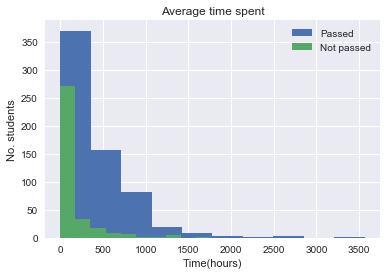

In [146]:
plt.hist(ps.total_minutes_visited,label='Passed')
plt.hist(nps.total_minutes_visited,label='Not passed')
plt.xlabel('Time(hours)')
plt.ylabel('No. students')
plt.title('Average time spent')
plt.legend()

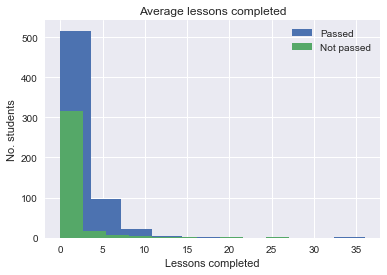

In [149]:
plt.hist(ps.lessons_completed,label='Passed')
plt.hist(nps.lessons_completed,label='Not passed')
plt.xlabel('Lessons completed')
plt.ylabel('No. students')
plt.title('Average lessons completed')
plt.legend()

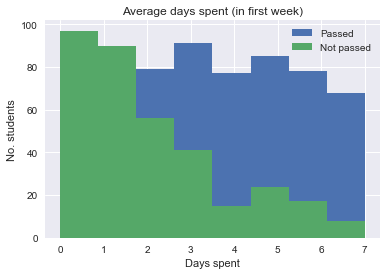

In [176]:
plt.figure()
plt.hist(ps.has_visited,label='Passed',bins=8)
plt.hist(nps.has_visited,label='Not passed',bins=8)
plt.xlabel('Days spent')
plt.ylabel('No. students')
plt.title('Average days spent (in first week)')
plt.legend()